# Clustering with Two Features
## we'll build a model to segment those households into distinct clusters, and examine the differences between those clusters.

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
import numpy as np

# Import

In [62]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = df["TURNFEAR"] == 1
    df = df[mask]
    return df

In [63]:
df = wrangle(r"C:\Users\hp\WorldQuantum\US-Segmentaion\US-Seg1.csv")

print("df type:", type(df))
print("df shape:", df.shape)

df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


### Create a scatter plot of that shows the total value of primary residence of a household ("HOUSES") as a function of the total value of household debt ("DEBT"). Be sure to label your x-axis as "Household Debt", your y-axis as "Home Value", and use the title "Credit Fearful: Home Value vs. Household Debt".

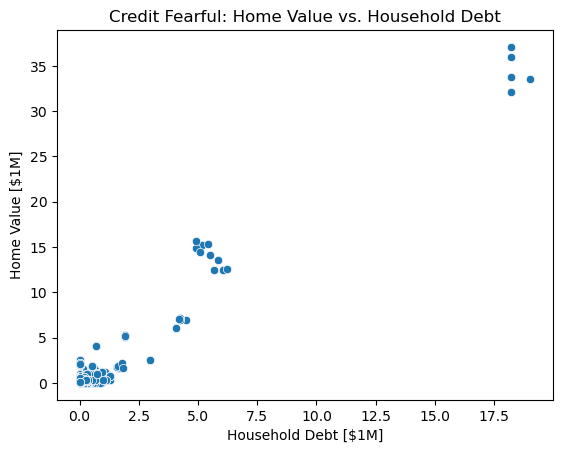

In [64]:
# Plot "HOUSES" vs "DEBT"
sns.scatterplot(x=df["DEBT"] / 1000000, y=df["HOUSES"] / 1000000) 
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

# Splits
### We need to split our data, but we're not going to need target vector or a test set this time around. That's because the model we'll be building involves unsupervised learning. It's called unsupervised because the model doesn't try to map input to a st of labels or targets that already exist. It's kind of like how humans learn new skills, in that we don't always have models to copy. Sometimes, we just try out something and see what happens. Keep in mind that this doesn't make these models any less useful, it just makes them different. 
So, keeping that in mind, let's do the split.

In [65]:
# Vertical Split
X = df[["DEBT",  "HOUSES"]]
print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


# Build Model

In [66]:
import matplotlib
matplotlib.use('TkAgg')  # or 'QtAgg' depending on your system

# If using Jupyter notebook, you might also want to add:
%matplotlib inline

In [67]:
from teaching_tools.widgets import ClusterWidget

cw = ClusterWidget(n_clusters=3)
cw.show()

### Run the cell below to display the SCFClusterWidget.

In [68]:
from teaching_tools.widgets import ClusterWidget, SCFClusterWidget

scfc = SCFClusterWidget(x=df["DEBT"], y=df["HOUSES"], n_clusters=3)
scfc.show()


# Iterate

### Build a KMeans model, assign it to the variable name model, and fit it to the training data X.

In [72]:
import os
from sklearn.cluster import KMeans
from threadpoolctl import threadpool_limits

# Limit the number of threads
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Use threadpoolctl to ensure thread limits
with threadpool_limits(limits=1, user_api='blas'):
    # Create and fit the model
    model = KMeans(n_clusters=3, random_state=42)
    print("model type:", type(model))

    # Fit model to data
    model.fit(X)


AttributeError: 'NoneType' object has no attribute 'split'

### Extract cluster labels

In [73]:
labels = model.labels_
print("labels type:", type(labels))
print("labels shape:", labels.shape)
labels[:10]

AttributeError: 'KMeans' object has no attribute 'labels_'

### Plot Clusters

In [ ]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(
    x=df["DEBT"] / 1e6,
    y=df["HOUSES"] / 1e6,
    hue=labels,
    palette="deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

### Extract & Plot Cetrois

In [74]:
centroids = model.cluster_centers_
print("centroids type:", type(centroids))
print("centroids shape:", centroids.shape)
centroids

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

### Inertia Score

In [ ]:
inertia = model.inertia_
print("inertia type:", type(inertia))
print("Inertia (3 clusters):", inertia)

### Silhouette score

### Silhouette score measures the distance between different clusters. It ranges from -1 (the worst) to 1 (the best), so it's easier to interpret than inertia. WQU WorldQuant University Applied Data Science Lab QQQQ

In [ ]:
ss = silhouette_score(X, model.labels_)
print("ss type:", type(ss))
print("Silhouette Score (3 clusters):", ss)

## Inertia Vs Clusters

In [ ]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors);
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters")

## Silhouette Score vs Number of Clusters

In [ ]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

### Build Final Model

In [ ]:
# Build model
final_model = KMeans(n_clusters=4, random_state=42)

print("final_model type:", type(final_model))

# Fit model to data
final_model.fit(X)

# Communicate

In [ ]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x=df["DEBT"] / 1e6,
    y=df["HOUSES"] / 1e6,
    hue=final_model.labels_,
    palette="deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

### Side by side: Bar Chart

In [ ]:
xgb = X.groupby(final_model.labels_).mean()
print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

In [ ]:
final_model.cluster_centers_

In [ ]:
# Create side-by-side bar chart of `xgb`
(xgb / 1e6).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

In [ ]:
(xgb["DEBT"] / xgb["HOUSES"]).plot(
    kind="bar",
    xlabel="Cluster",
    ylabel="Proportion, Debt/Home",
    title="Proportion of Debt to Home Value"
);